<a href="https://colab.research.google.com/github/firaolkiya/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions/blob/main/notebooks/eda_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import seaborn as sns # Import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

**READ FILE**

In [ ]:
dff = pd.read_csv('/content/Fraud_Data.csv', engine='python')
dfi = pd.read_csv('/content/IpAddress_to_Country.csv', engine='python')
dfc = pd.read_csv('/content/creditcard.csv', engine='python')

In [ ]:

print("Fraud data.....................................")
dff.head(10)

Fraud data.....................................


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


**Handle missing values**

In [ ]:
def check_missing_values(df,tag):
    print("Missing values in ",tag)
    missing_values = df.isnull().sum()
    print(missing_values)
    print("============================================================================")

In [ ]:
check_missing_values(dff,"Fraud data")
check_missing_values(dfi,"Ip data")
check_missing_values(dfc,"Credit card data")

Missing values in  Fraud data
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Missing values in  Ip data
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Missing values in  Credit card data
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
dfc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dfi.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


**Remove Duplicates**

In [ ]:

print("Original dataframe shape (dff):", dff.shape)
dff_duplicates = dff.duplicated().sum()
print("Number of duplicate rows in dff:", dff_duplicates)
if dff_duplicates > 0:
    dff = dff.drop_duplicates()
    print("Shape of dff after removing duplicates:", dff.shape)

print("Original dataframe shape (dfi):", dfi.shape)
dfi_duplicates = dfi.duplicated().sum()
print("Number of duplicate rows in dfi:", dfi_duplicates)
if dfi_duplicates > 0:
    dfi = dfi.drop_duplicates()
    print("Shape of dfi after removing duplicates:", dfi.shape)

print("Original dataframe shape (dfc):", dfc.shape)
dfc_duplicates = dfc.duplicated().sum()
print("Number of duplicate rows in dfc:", dfc_duplicates)
if dfc_duplicates > 0:
    dfc = dfc.drop_duplicates()
    print("Shape of dfc after removing duplicates:", dfc.shape)

Original dataframe shape (dff): (151112, 11)
Number of duplicate rows in dff: 0
Original dataframe shape (dfi): (138846, 3)
Number of duplicate rows in dfi: 0
Original dataframe shape (dfc): (284807, 31)
Number of duplicate rows in dfc: 1081
Shape of dfc after removing duplicates: (283726, 31)


In [ ]:
# Take a sample of 10000 rows from each dataframe
dff = dff.sample(n=3000, random_state=42).reset_index(drop=True)
dfi = dfi.sample(n=3000, random_state=42).reset_index(drop=True)
dfc = dfc.sample(n=3000, random_state=42).reset_index(drop=True)

print("Shape of dff after sampling:", dff.shape)
print("Shape of dfi after sampling:", dfi.shape)
print("Shape of dfc after sampling:", dfc.shape)

Shape of dff after sampling: (3000, 11)
Shape of dfi after sampling: (3000, 3)
Shape of dfc after sampling: (3000, 31)


In [ ]:

# **Correct Data Types**

# Convert 'signup_time' and 'purchase_time' in dff to datetime objects
dff['signup_time'] = pd.to_datetime(dff['signup_time'])
dff['purchase_time'] = pd.to_datetime(dff['purchase_time'])

# Convert 'Timestamp' in dfc to datetime objects
dfc['Time'] = pd.to_datetime(dfc['Time'], unit='s')

print("\nData types after conversion (dff):")
print(dff.info())

print("\nData types after conversion (dfc):")
print(dfc.info())

print("\nData types after conversion (dfi):")
print(dfi.info()) # No datetime conversions needed for dfi based on typical use cases



Data types after conversion (dff):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3000 non-null   int64         
 1   signup_time     3000 non-null   datetime64[ns]
 2   purchase_time   3000 non-null   datetime64[ns]
 3   purchase_value  3000 non-null   int64         
 4   device_id       3000 non-null   object        
 5   source          3000 non-null   object        
 6   browser         3000 non-null   object        
 7   sex             3000 non-null   object        
 8   age             3000 non-null   int64         
 9   ip_address      3000 non-null   float64       
 10  class           3000 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 257.9+ KB
None

Data types after conversion (dfc):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 en

**Univariate analysis**


Univariate Analysis (dff):


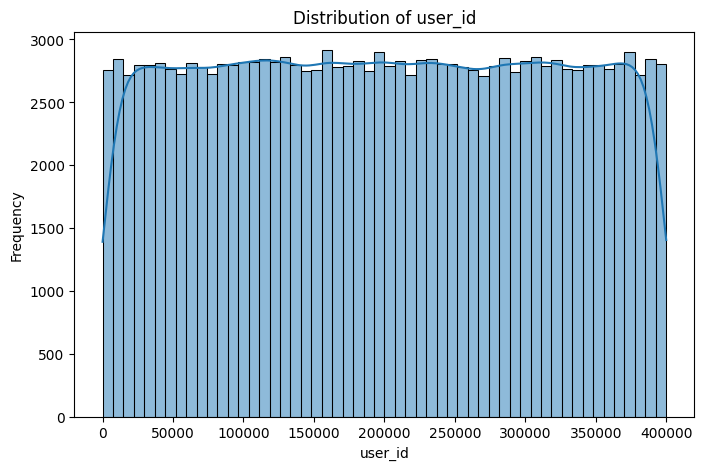

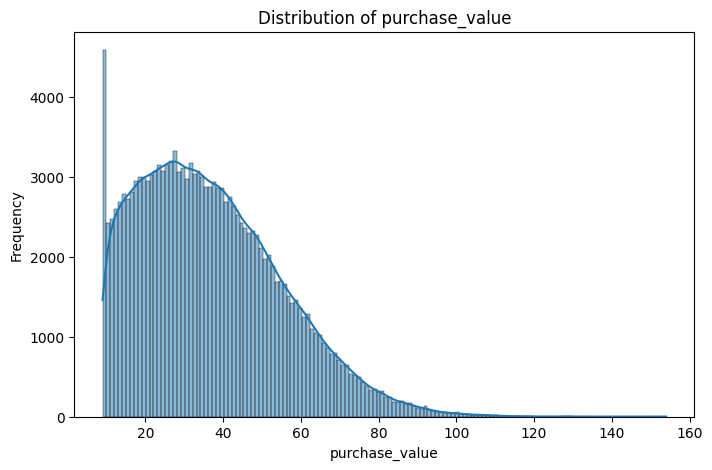

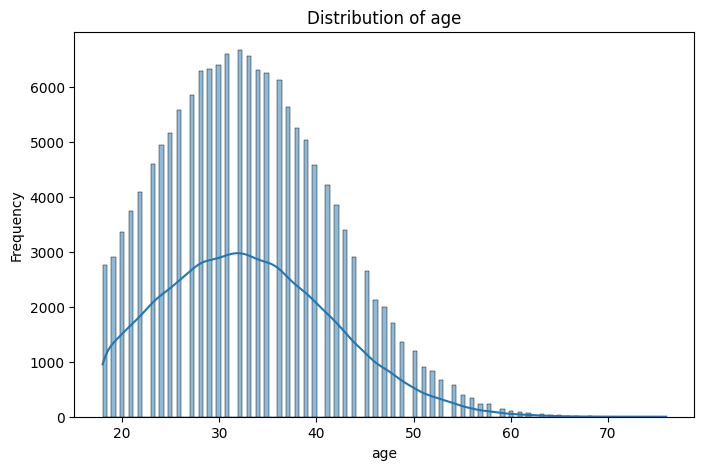

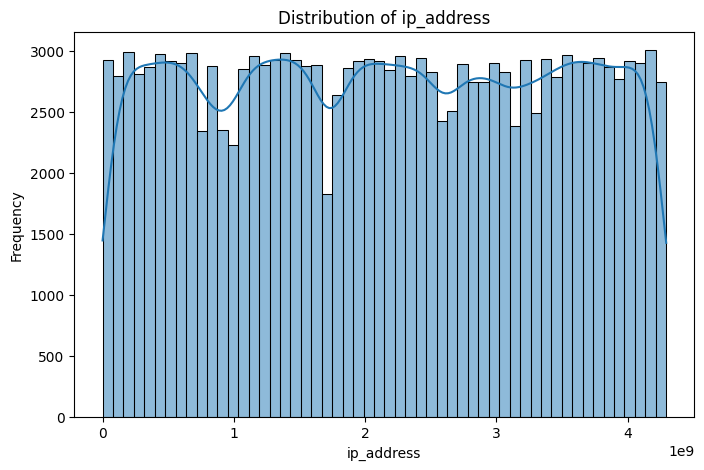

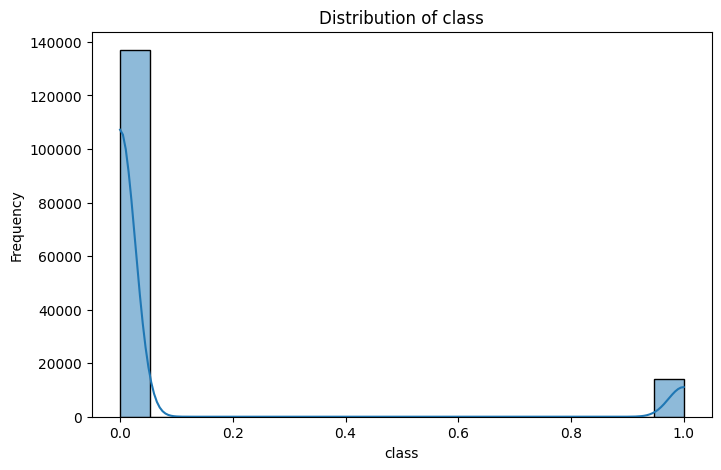

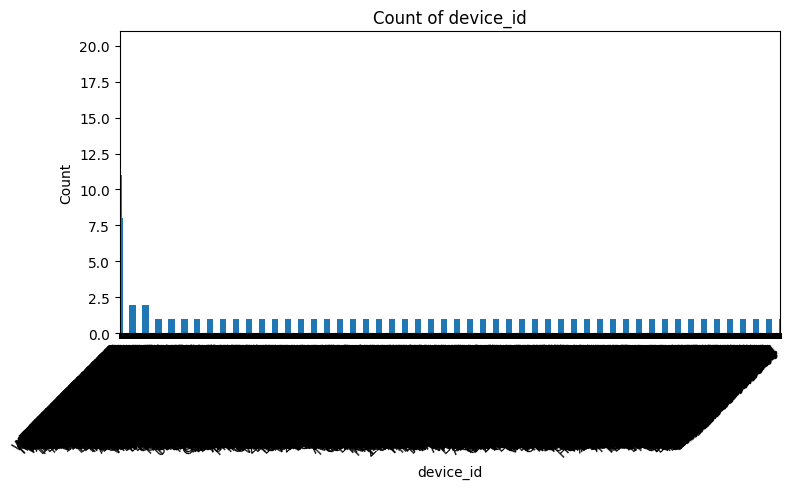

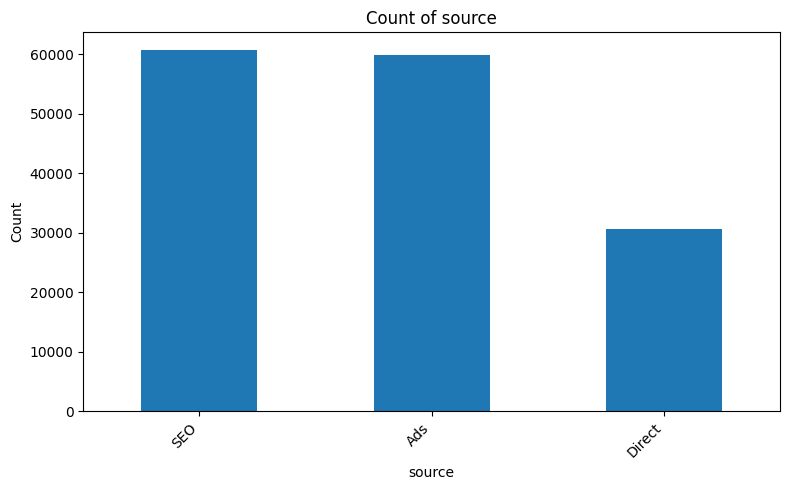

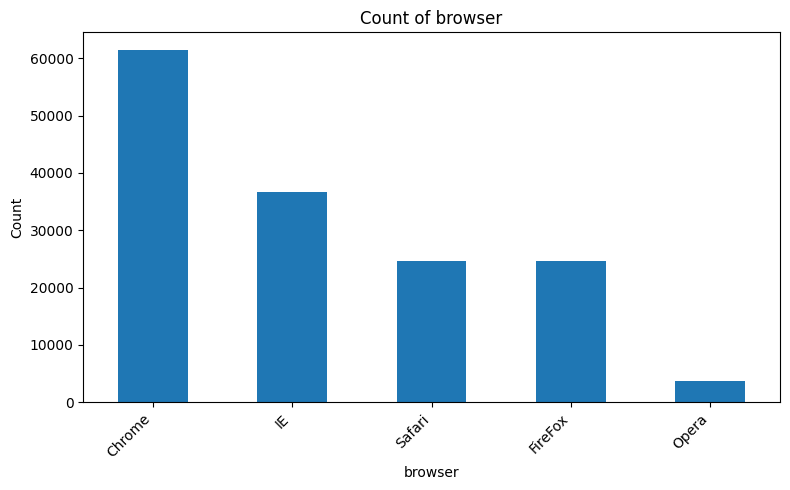

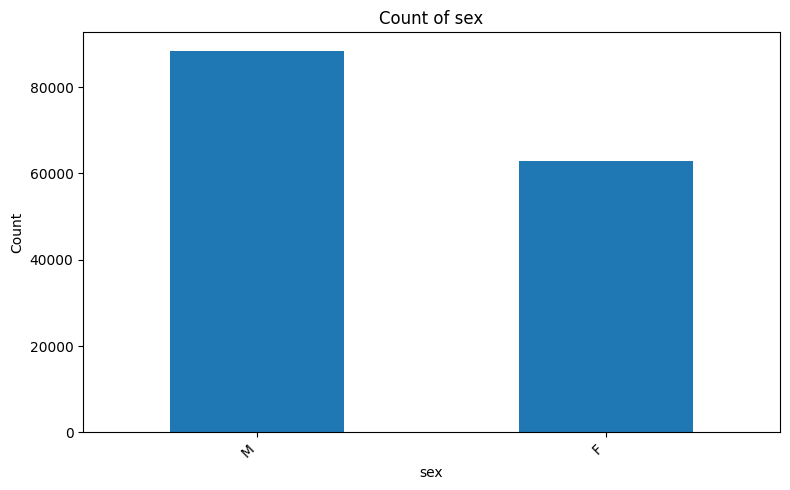


Univariate Analysis (dfc):


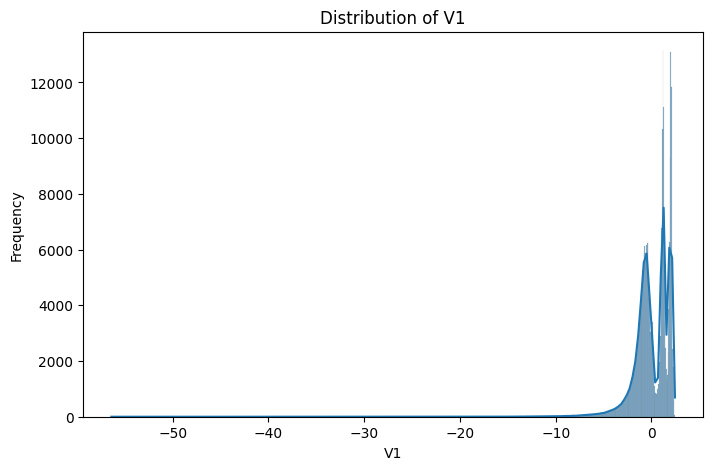

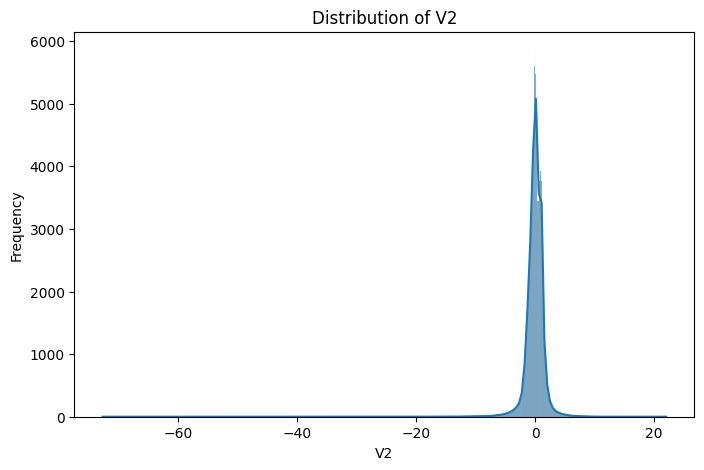

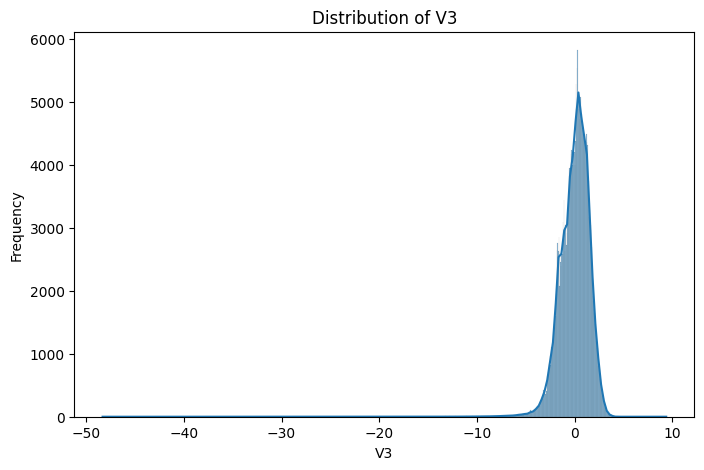

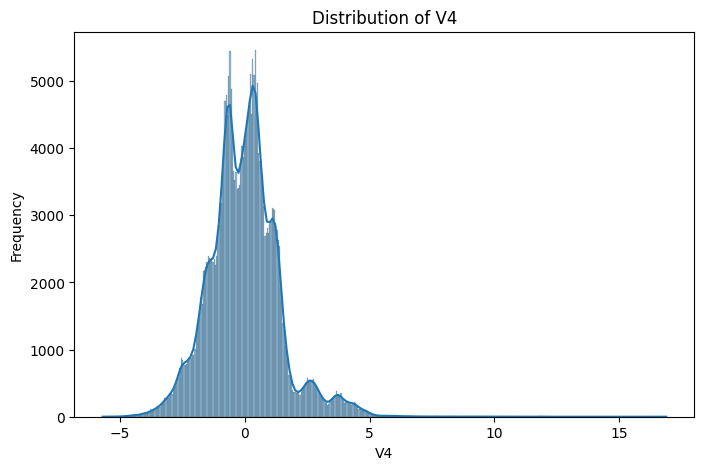

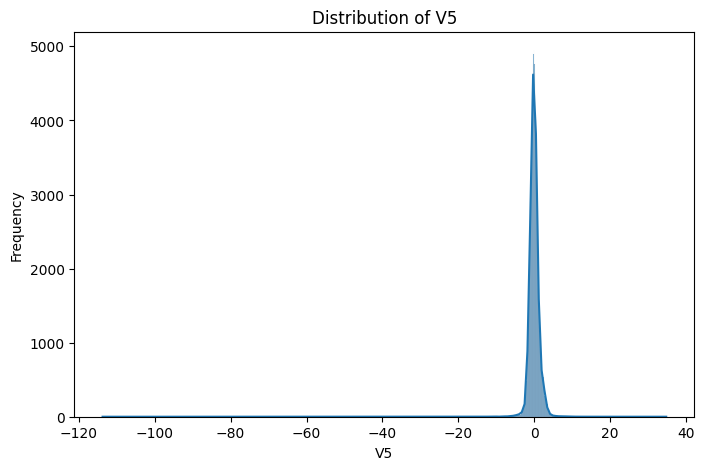

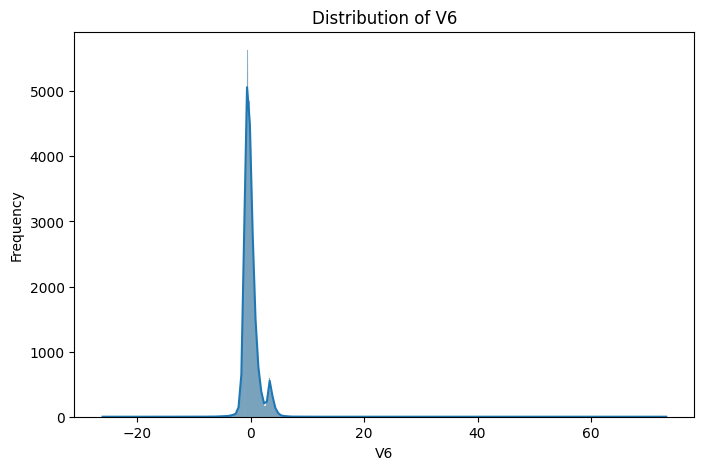

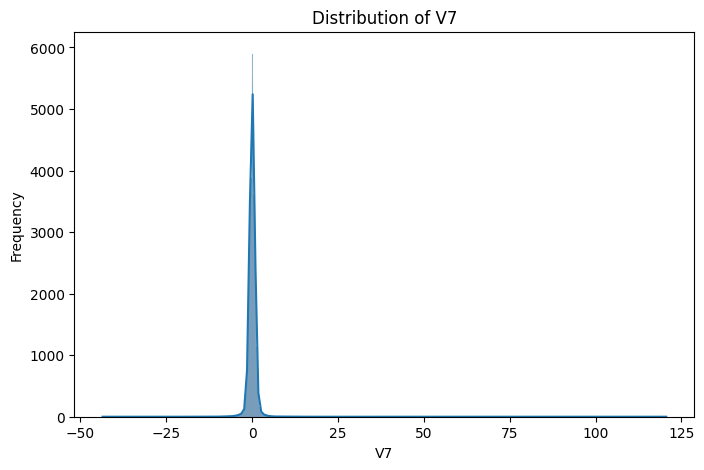

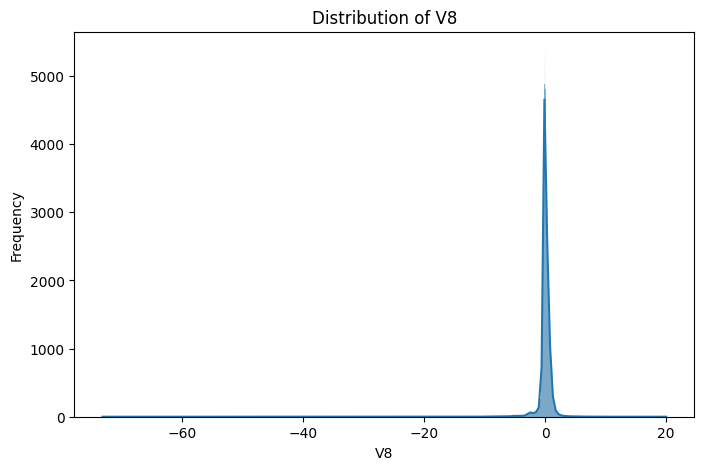

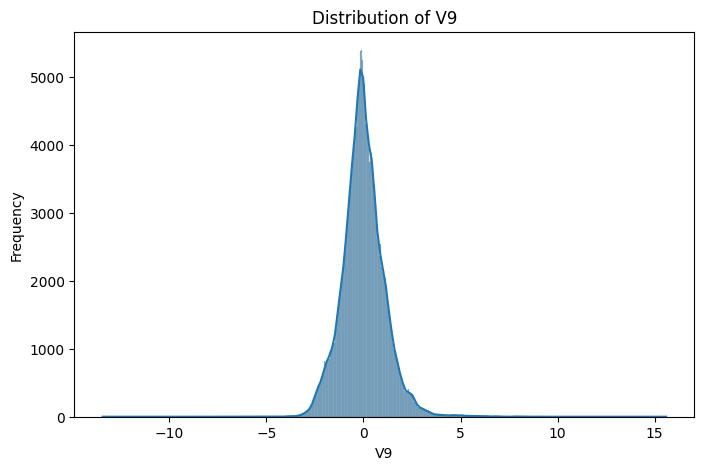

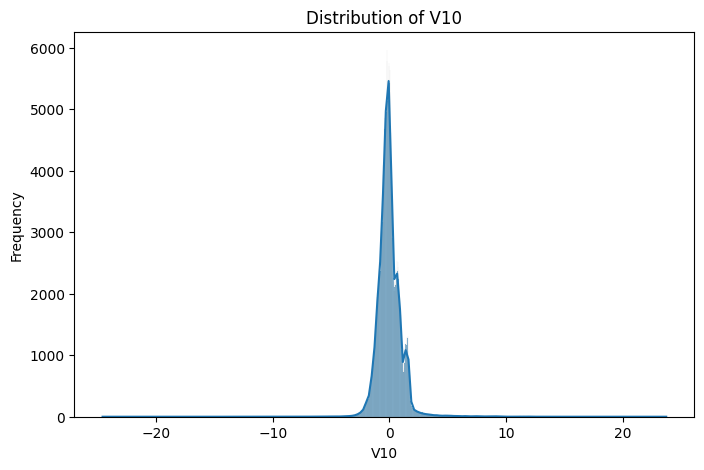

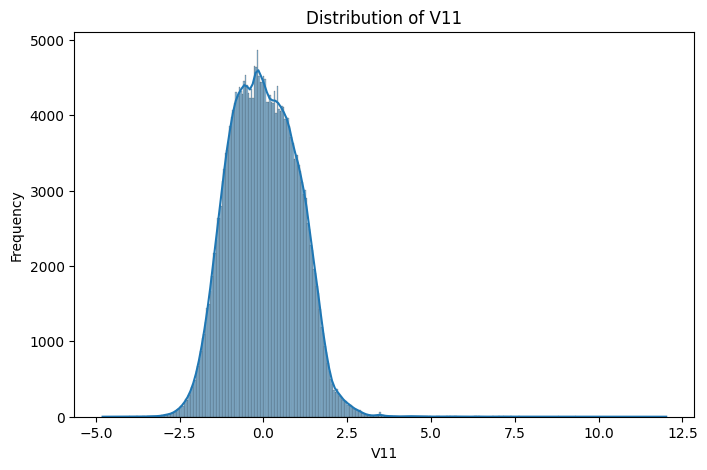

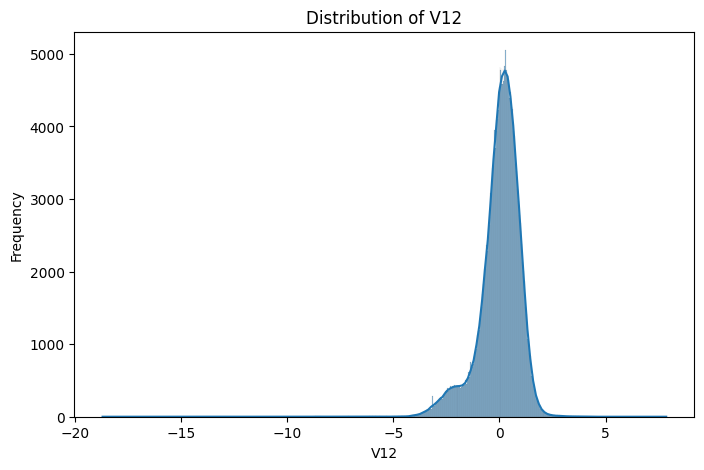

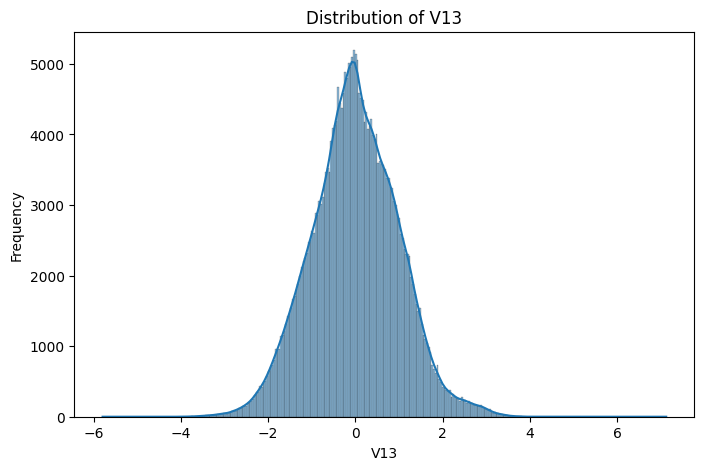

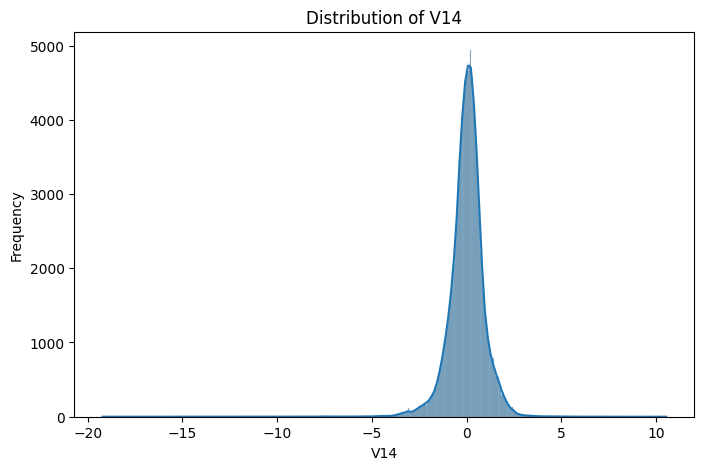

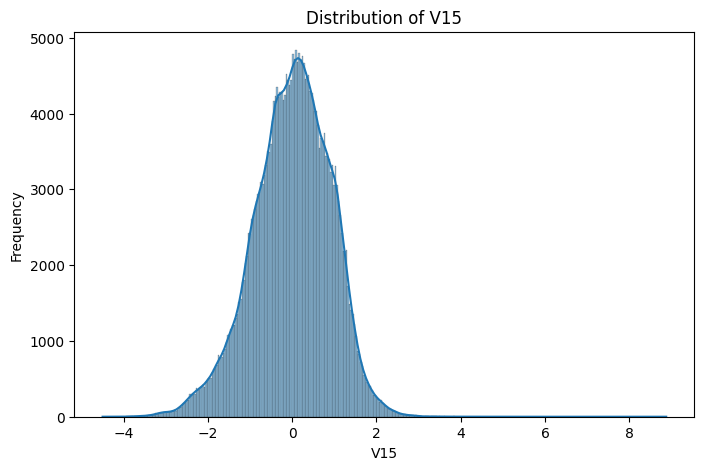

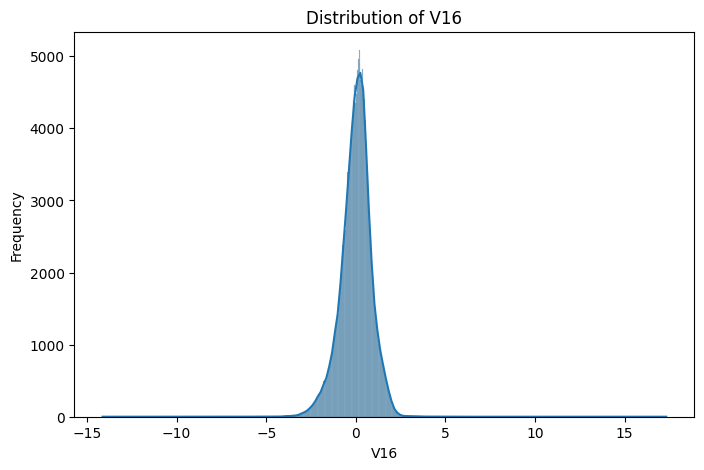

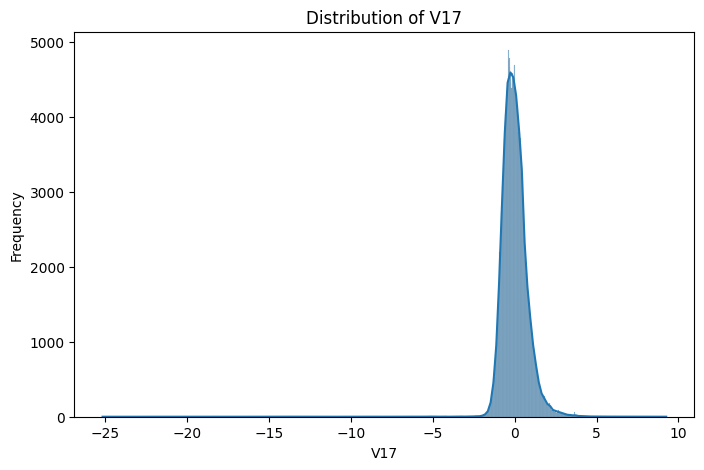

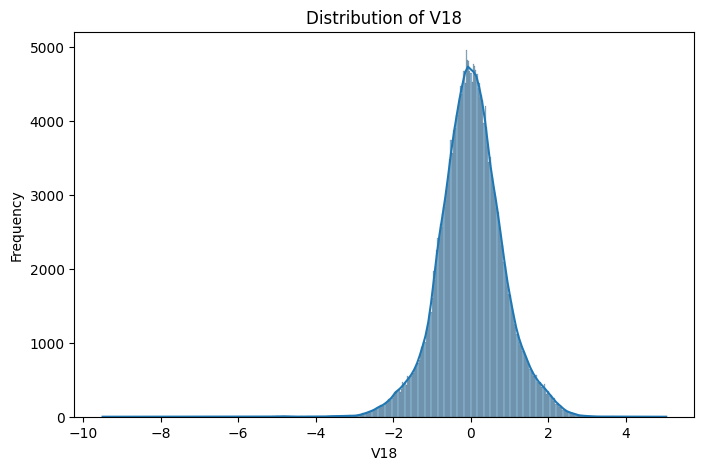

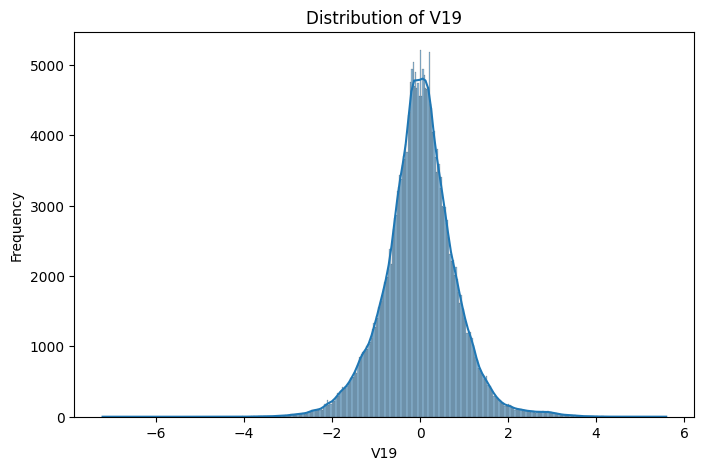

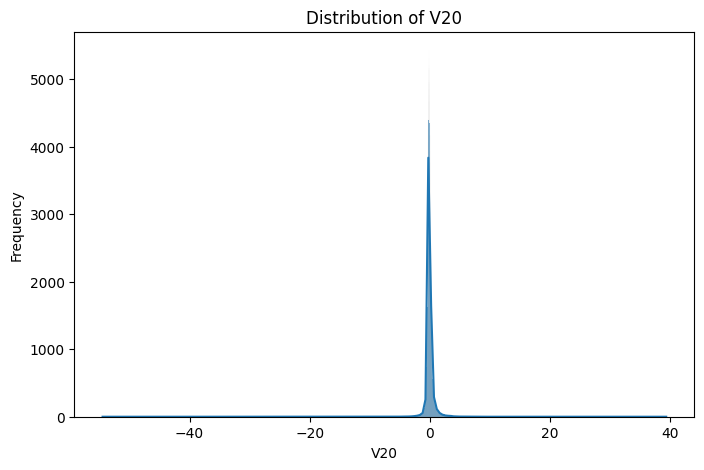

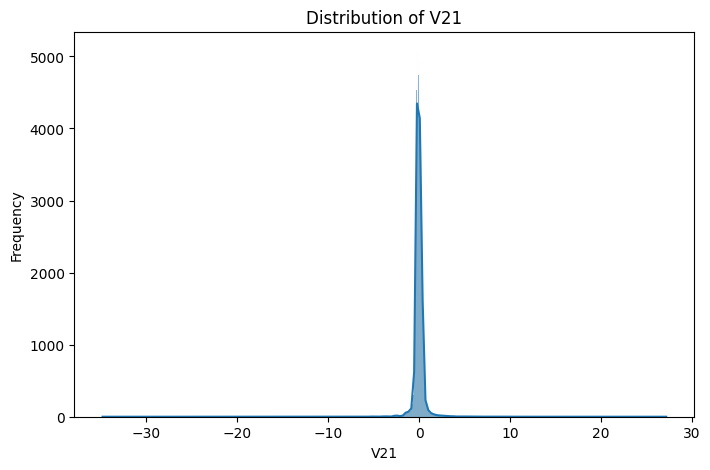

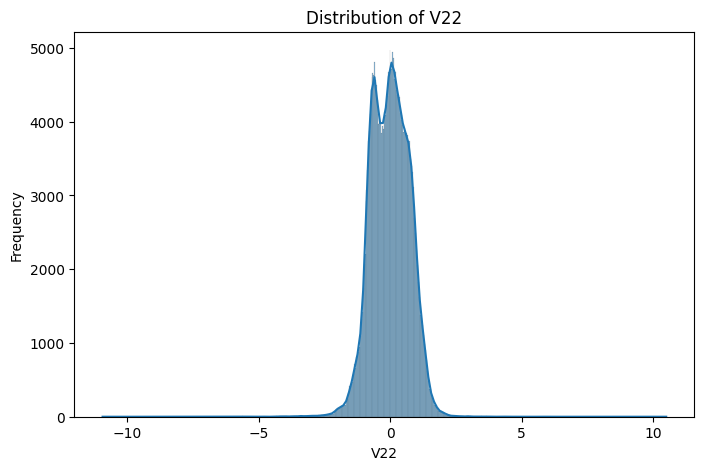

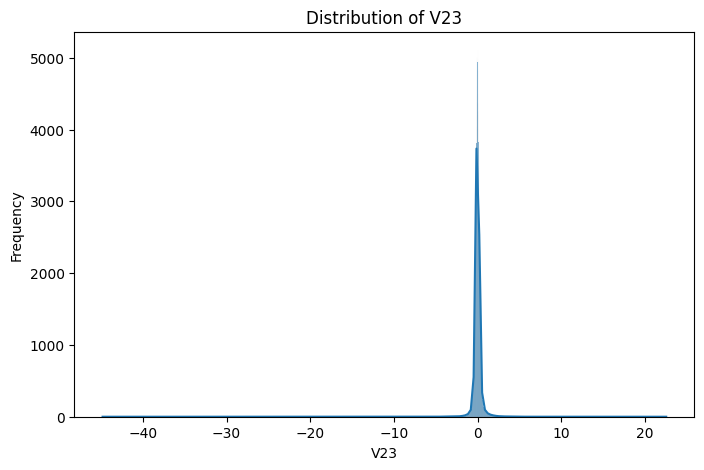

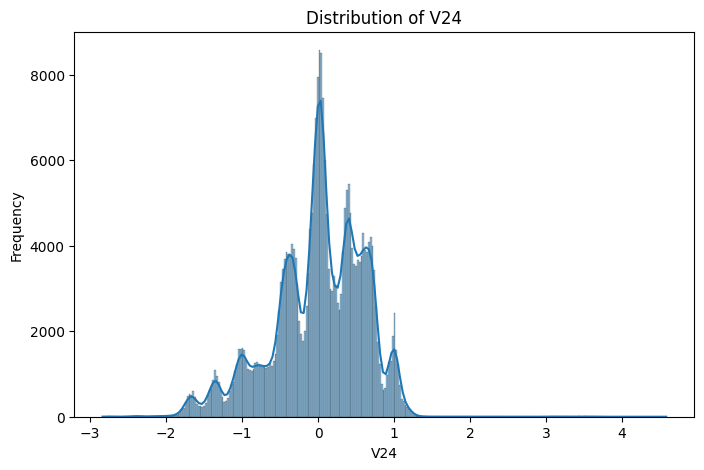

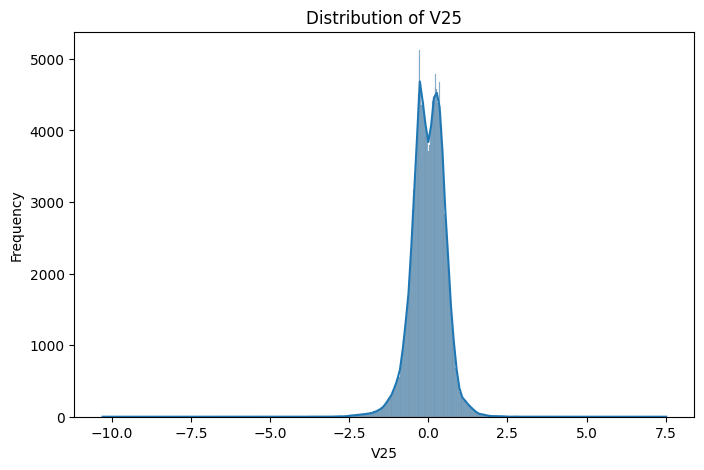

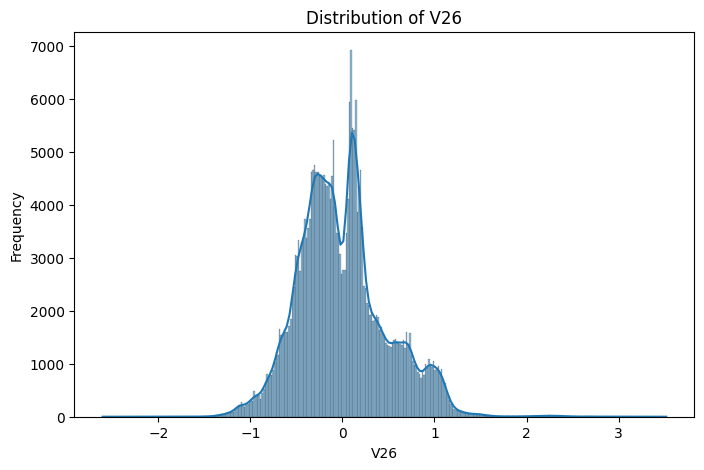

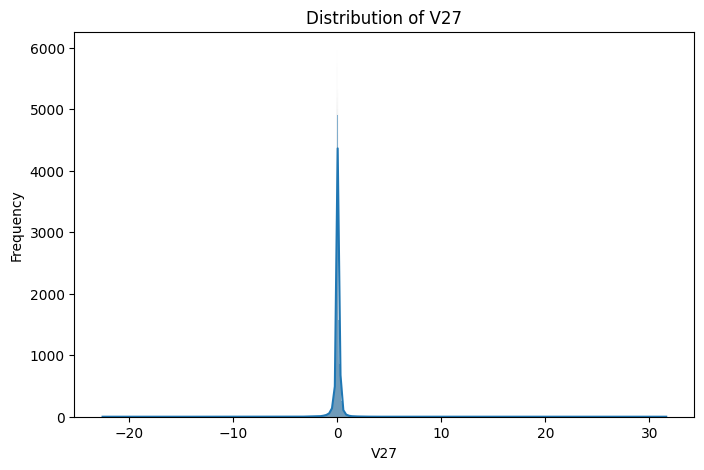

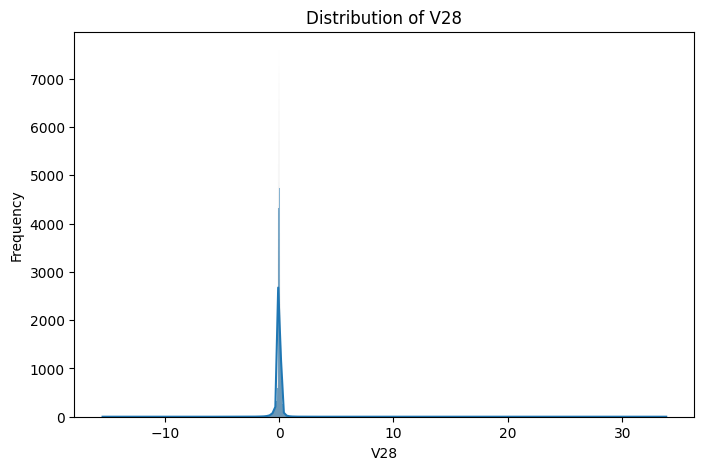

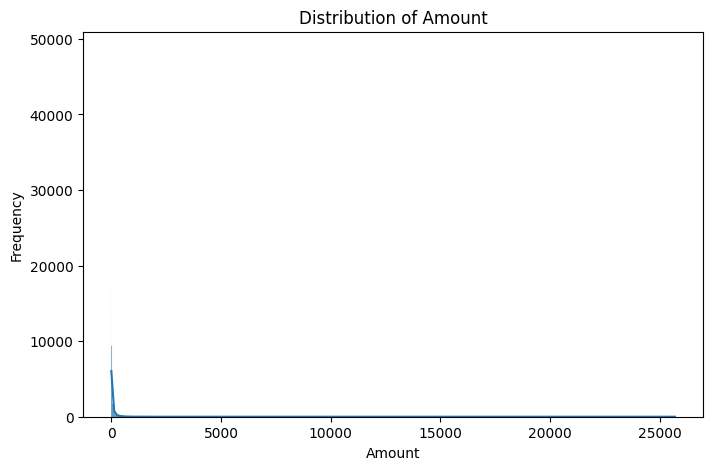

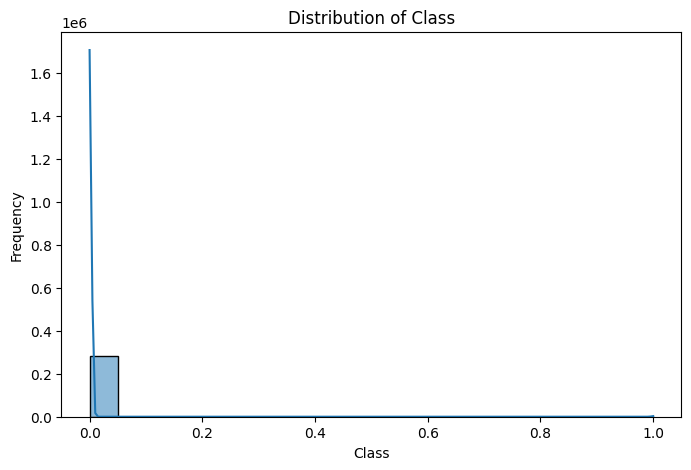


Univariate Analysis (dfi - Countries):


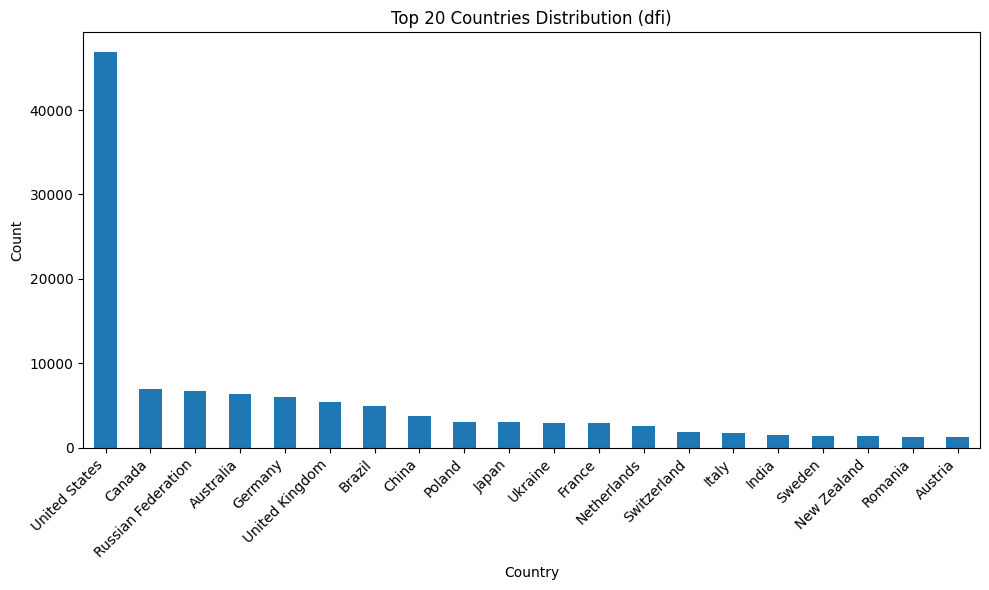

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

print("\nUnivariate Analysis (dff):")
numerical_cols_dff = dff.select_dtypes(include=np.number).columns
for col in numerical_cols_dff:
    plt.figure(figsize=(8, 5))
    sns.histplot(dff[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis for categorical columns in dff
categorical_cols_dff = dff.select_dtypes(include='object').columns
for col in categorical_cols_dff:
    plt.figure(figsize=(8, 5))
    dff[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Univariate analysis for numerical columns in dfc
print("\nUnivariate Analysis (dfc):")
numerical_cols_dfc = dfc.select_dtypes(include=np.number).columns
for col in numerical_cols_dfc:
    plt.figure(figsize=(8, 5))
    sns.histplot(dfc[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# direct univariate analysis with histograms might not be as meaningful
# unless we analyze the distribution of countries.
print("\nUnivariate Analysis (dfi - Countries):")
if 'country' in dfi.columns:
    plt.figure(figsize=(10, 6))
    dfi['country'].value_counts().nlargest(20).plot(kind='bar') # Top 20 countries
    plt.title('Top 20 Countries Distribution (dfi)')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:

# Relationship between `purchase_value` and `age`
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dff, x='age', y='purchase_value', alpha=0.5)
plt.title('Purchase Value vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Value')
plt.show()

# Relationship between `purchase_value` and `class` (assuming 'class' indicates fraud/non-fraud)
if 'class' in dff.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dff, x='class', y='purchase_value')
    plt.title('Purchase Value by Class (Fraud/Non-Fraud)')
    plt.xlabel('Class')
    plt.ylabel('Purchase Value')
    plt.show()

# Relationship between `signup_time` and `purchase_time` (Time difference)
dff['time_to_purchase'] = (dff['purchase_time'] - dff['signup_time']).dt.total_seconds() / 3600 # in hours
plt.figure(figsize=(10, 6))
sns.histplot(data=dff, x='time_to_purchase', bins=50, kde=True)
plt.title('Distribution of Time from Signup to Purchase')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.show()

# Relationship between `source` and `class`
if 'class' in dff.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dff, x='source', hue='class')
    plt.title('Fraud Count by Source')
    plt.xlabel('Source')
    plt.ylabel('Count')
    plt.show()

# Relationship between `browser` and `class`
if 'class' in dff.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dff, x='browser', hue='class')
    plt.title('Fraud Count by Browser')
    plt.xlabel('Browser')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Relationship between `sex` and `class`
if 'class' in dff.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dff, x='sex', hue='class')
    plt.title('Fraud Count by Sex')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.show()

# Bivariate Analysis for dfc (Credit Card Data)

# Relationship between `Amount` and `Class`
if 'Class' in dfc.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dfc, x='Class', y='Amount')
    plt.title('Transaction Amount by Class (Fraud/Non-Fraud)')
    plt.xlabel('Class')
    plt.ylabel('Amount')
    plt.show()

# Relationship between `Time` and `Amount` (for both classes)
if 'Class' in dfc.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=dfc, x='Time', y='Amount', hue='Class', alpha=0.5)
    plt.title('Transaction Amount over Time, by Class')
    plt.xlabel('Time')
    plt.ylabel('Amount')
    plt.show()

# Correlation matrix for numerical features in dfc
if 'Class' in dfc.columns:
    plt.figure(figsize=(12, 10))
    corr_matrix_dfc = dfc.drop('Time', axis=1).corr() # Exclude Time for direct correlation
    sns.heatmap(corr_matrix_dfc, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Matrix (Credit Card Data)')
    plt.show()

# Bivariate Analysis with dfi (Ip Address Data) - requires merging

# Assuming dfi has 'ip_address' and 'country' columns for a simple merge demonstration
# If not, this section needs adaptation based on the actual structure of dfi.
if 'ip_address' in dfi.columns and 'country' in dfi.columns:
    print("\nAttempting merge for Bivariate Analysis (dff and dfi)...")
    # This simple merge assumes dfi has a direct 'ip_address' column matching dff
    # If dfi has IP ranges, a different join/lookup logic is required.
    df_merged = pd.merge(dff, dfi[['ip_address', 'country']], on='ip_address', how='left')

    if 'class' in df_merged.columns:
        # Fraud rate by Country (Top 20 countries)
        country_fraud = df_merged.groupby('country')['class'].agg(['count', 'sum'])
        country_fraud['fraud_rate'] = country_fraud['sum'] / country_fraud['count']
        country_fraud_top20 = country_fraud.sort_values(by='fraud_rate', ascending=False).head(20)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=country_fraud_top20.index, y='fraud_rate', data=country_fraud_top20)
        plt.title('Top 20 Countries by Fraud Rate (dff and dfi)')
        plt.xlabel('Country')
        plt.ylabel('Fraud Rate')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'class' not found in merged dataframe for fraud analysis.")
else:
    print("\nSkipping dfi bivariate analysis: dfi does not seem to have a direct 'ip_address' and 'country' column suitable for simple merge.")
    print("Bivariate analysis with dfi requires understanding its structure (IP ranges) and implementing appropriate lookup/merge logic.")

**Merge Datasets for Geolocation Analysis**


Mapping IP addresses to countries...
IP to country mapping complete.

Fraud data with merged country information:
   user_id         signup_time       purchase_time  purchase_value  \
0   324640 2015-01-23 09:55:40 2015-03-04 01:26:04              45   
1   244111 2015-06-24 17:42:18 2015-06-25 12:00:50              54   
2    81345 2015-04-04 05:17:38 2015-07-11 07:35:20              62   
3    25395 2015-08-17 21:04:49 2015-10-17 18:00:17              66   
4    11703 2015-02-01 08:27:50 2015-03-21 14:23:17              34   

       device_id source browser sex  age  ip_address  class country  
0  YSWUULDQAGHTI    Ads      IE   F   33  3315147387      0    None  
1  MMEFSFDBNLQZI    SEO      IE   M   36   991628325      0    None  
2  WQNNNGXSRAMWD    Ads      IE   F   19   274442709      0    None  
3  KXZJMHXNVEGLC    SEO  Chrome   F   49  2654816479      1    None  
4  XJYCMQURWOUCE    Ads  Chrome   F   45  1419979966      0    None  

Fraud rate by country (including merged dat

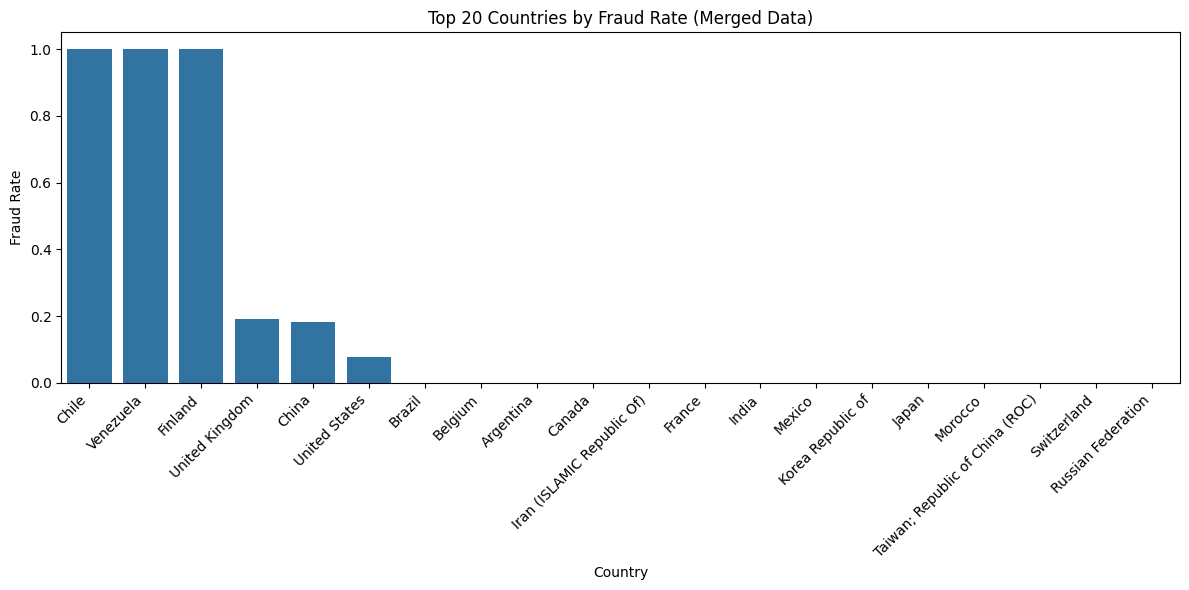

In [ ]:
# Function to convert an IP address string to an integer
def ip_to_int(ip_address):
    if pd.isnull(ip_address):
        return None
    try:
        # Convert the float IP address to an integer
        return int(ip_address)
    except:
        return None

# Apply the conversion function to the 'ip_address' column in dff
dff['ip_address'] = dff['ip_address'].apply(ip_to_int)

# Ensure dfi is sorted by 'lower_bound_ip_address' for efficient lookup
dfi = dfi.sort_values(by='lower_bound_ip_address').reset_index(drop=True)

# Function to find the country for a given IP integer
def find_country(ip_int):
    if pd.isnull(ip_int):
        return None
    # Use searchsorted to find the index where the ip_int would be inserted
    # The desired range would be in the row just before this insertion point.
    pos = dfi['lower_bound_ip_address'].searchsorted(ip_int, side='right') - 1

    # Check if the IP is within the range of the found row
    if pos >= 0 and pos < len(dfi) and ip_int >= dfi.loc[pos, 'lower_bound_ip_address'] and ip_int <= dfi.loc[pos, 'upper_bound_ip_address']:
        return dfi.loc[pos, 'country']
    else:
        return None

# Apply the lookup function to the integer IP addresses in dff
print("\nMapping IP addresses to countries...")
# More performant solutions exist (e.g., using numpy, specialized libraries, or database joins).
dff['country'] = dff['ip_address'].apply(find_country)
print("IP to country mapping complete.")

# Now dff has a 'country' column added from the merge/lookup
# Let's check the head of the merged data
print("\nFraud data with merged country information:")
print(dff.head())

# For example, analyzing fraud rates by country:
if 'class' in dff.columns:
    print("\nFraud rate by country (including merged data):")
    country_fraud = dff.groupby('country')['class'].agg(['count', 'sum'])
    # Handle cases where count might be 0 to avoid division by zero
    country_fraud['fraud_rate'] = country_fraud.apply(lambda row: row['sum'] / row['count'] if row['count'] > 0 else 0, axis=1)

    # Display top countries by fraud rate
    print(country_fraud.sort_values(by='fraud_rate', ascending=False).head())

    # Display top countries by fraud count
    print("\nTop countries by fraud count:")
    print(country_fraud.sort_values(by='sum', ascending=False).head())

    # Plotting fraud rate by country (Top N)
    country_fraud_top20 = country_fraud.sort_values(by='fraud_rate', ascending=False).head(20)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_fraud_top20.index, y='fraud_rate', data=country_fraud_top20)
    plt.title('Top 20 Countries by Fraud Rate (Merged Data)')
    plt.xlabel('Country')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
     print("Column 'class' not found in dff for fraud analysis by country.")

**Feature Engineering**

In [ ]:
# Extract hour of day from purchase_time
dff['hour_of_day'] = dff['purchase_time'].dt.hour

# Extract day of week from purchase_time
dff['day_of_week'] = dff['purchase_time'].dt.dayofweek # Monday=0, Sunday=6

# Calculate time since signup in hours
dff['time_since_signup'] = (dff['purchase_time'] - dff['signup_time']).dt.total_seconds() / 3600

# For simplicity, we'll set negative values to 0 or NaN. Choosing 0 here.
dff['time_since_signup'] = dff['time_since_signup'].apply(lambda x: max(0, x))

# Count transactions per user_id
user_transaction_counts = dff.groupby('user_id').size().reset_index(name='transaction_frequency')
dff = pd.merge(dff, user_transaction_counts, on='user_id', how='left')

# Display the first few rows with new features
print("\nFraud data with new features:")
print(dff[['user_id', 'signup_time', 'purchase_time', 'hour_of_day', 'day_of_week', 'time_since_signup']].head())

# Check distributions of new numerical features
print("\nDistribution of new numerical features:")
new_numerical_cols = ['hour_of_day', 'day_of_week', 'time_since_signup', 'transaction_frequency']



Fraud data with new features:
   user_id         signup_time       purchase_time  hour_of_day  day_of_week  \
0   324640 2015-01-23 09:55:40 2015-03-04 01:26:04            1            2   
1   244111 2015-06-24 17:42:18 2015-06-25 12:00:50           12            3   
2    81345 2015-04-04 05:17:38 2015-07-11 07:35:20            7            5   
3    25395 2015-08-17 21:04:49 2015-10-17 18:00:17           18            5   
4    11703 2015-02-01 08:27:50 2015-03-21 14:23:17           14            5   

   time_since_signup  
0         951.506667  
1          18.308889  
2        2354.295000  
3        1460.924444  
4        1157.924167  

Distribution of new numerical features:


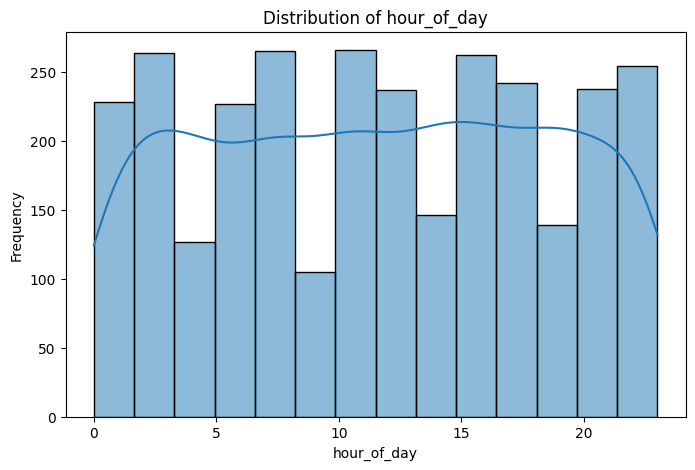

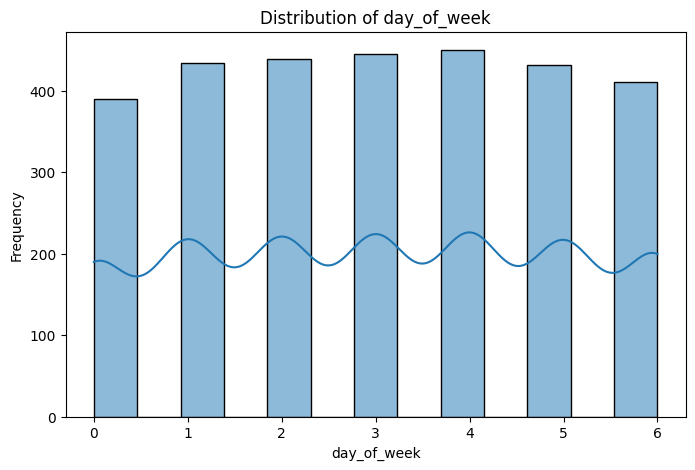

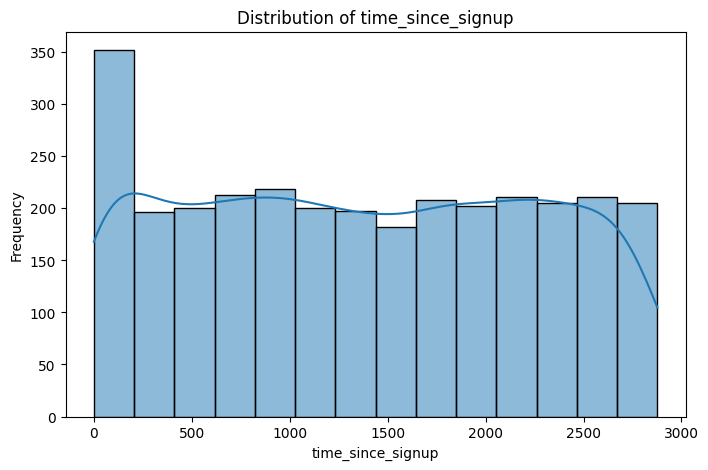

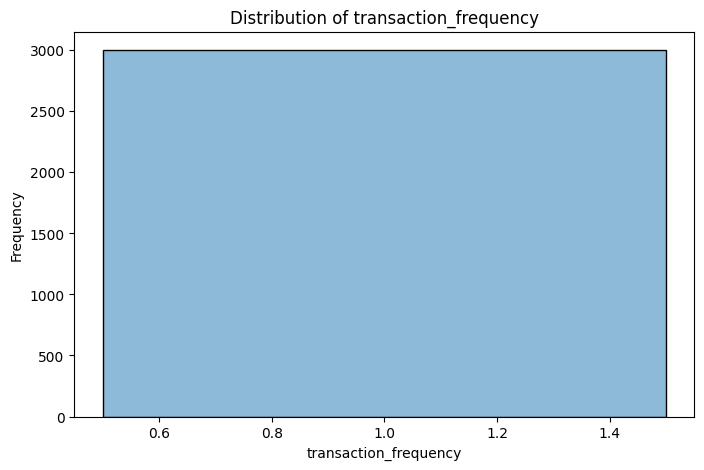


Analysis of new features vs. Class:


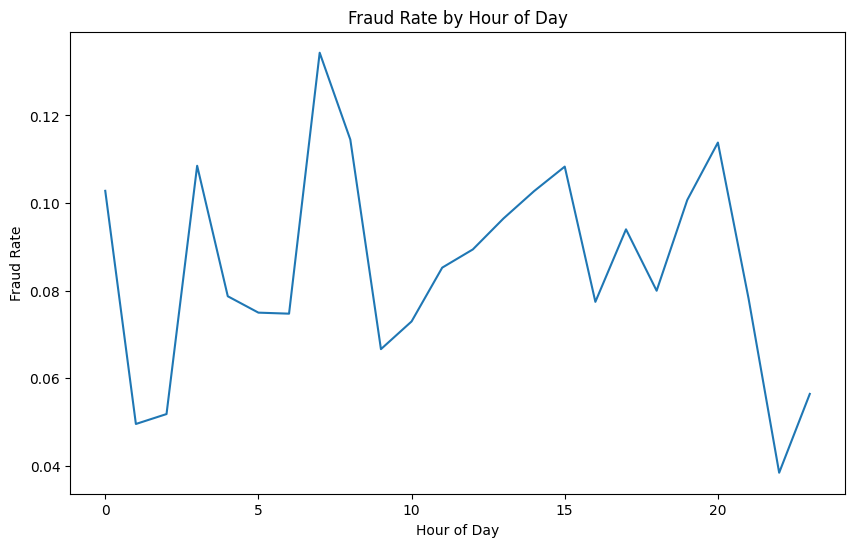

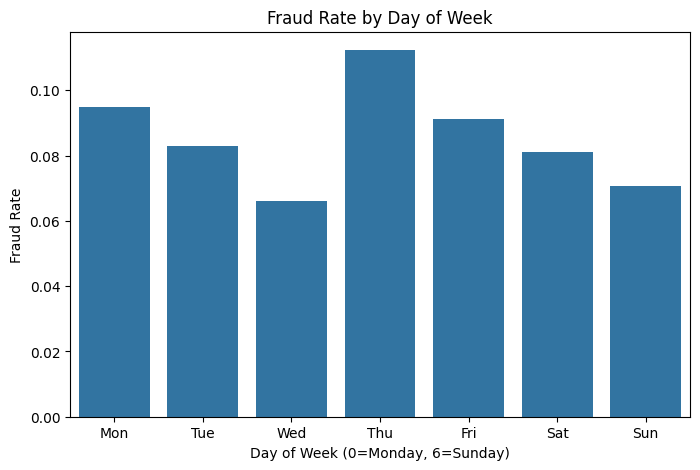

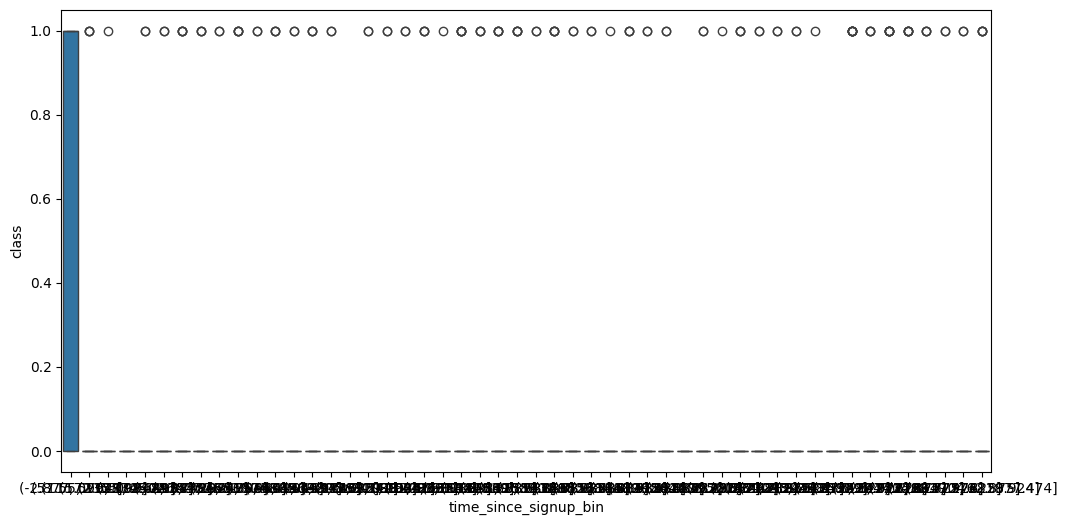

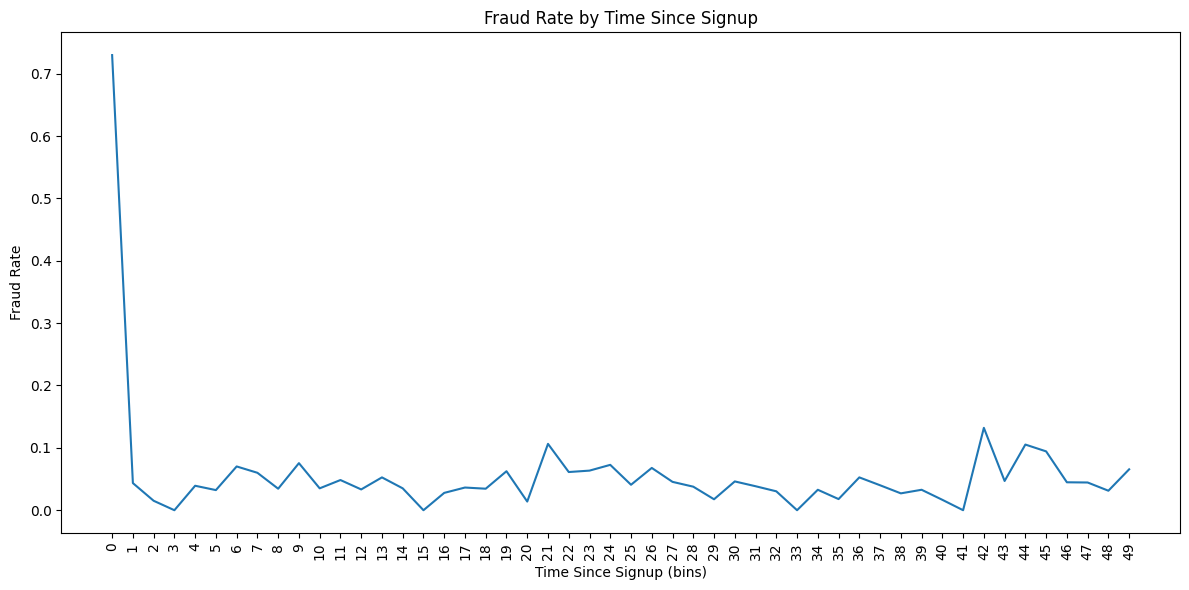

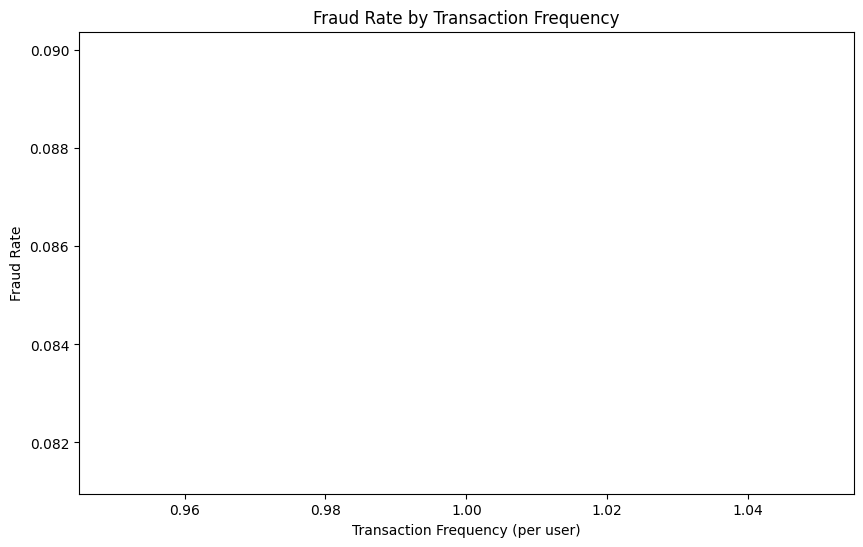

In [ ]:

for col in new_numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(dff[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Analyze relationship between new features and 'class' (if 'class' exists)
if 'class' in dff.columns:
    print("\nAnalysis of new features vs. Class:")

    # Hour of day vs. Fraud Rate
    plt.figure(figsize=(10, 6))
    hourly_fraud_rate = dff.groupby('hour_of_day')['class'].mean().reset_index(name='fraud_rate')
    sns.lineplot(data=hourly_fraud_rate, x='hour_of_day', y='fraud_rate')
    plt.title('Fraud Rate by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Fraud Rate')
    plt.show()

    # Day of week vs. Fraud Rate
    plt.figure(figsize=(8, 5))
    daily_fraud_rate = dff.groupby('day_of_week')['class'].mean().reset_index(name='fraud_rate')
    sns.barplot(data=daily_fraud_rate, x='day_of_week', y='fraud_rate')
    plt.title('Fraud Rate by Day of Week')
    plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
    plt.ylabel('Fraud Rate')
    plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show()

    # Time since signup vs. Fraud (e.g., split into bins)
    dff['time_since_signup_bin'] = pd.cut(dff['time_since_signup'], bins=50) # Adjust bins as needed
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=dff, x='time_since_signup_bin', y='class') # Boxplot might not be ideal with bins and class
    # Alternative: Fraud rate by time_since_signup bins
    time_bin_fraud_rate = dff.groupby('time_since_signup_bin', observed=True)['class'].mean().reset_index(name='fraud_rate')
    plt.figure(figsize=(12, 6))
    plt.plot(time_bin_fraud_rate.index.astype(str), time_bin_fraud_rate['fraud_rate']) # Plotting against bin labels
    plt.title('Fraud Rate by Time Since Signup')
    plt.xlabel('Time Since Signup (bins)')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Transaction frequency vs. Fraud
    plt.figure(figsize=(10, 6))
    freq_fraud_rate = dff.groupby('transaction_frequency')['class'].mean().reset_index(name='fraud_rate')
    sns.lineplot(data=freq_fraud_rate, x='transaction_frequency', y='fraud_rate')
    plt.title('Fraud Rate by Transaction Frequency')
    plt.xlabel('Transaction Frequency (per user)')
    plt.ylabel('Fraud Rate')
    plt.show()

else:
    print("\nColumn 'class' not found in dff. Skipping fraud analysis for new features.")

In [ ]:
print(dfi.columns)

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')


In [ ]:


if 'class' in dff.columns:
    print("\nOriginal class distribution in dff:")
    print(dff['class'].value_counts())
    print("\nOriginal class distribution percentage:")
    print(dff['class'].value_counts(normalize=True) * 100)

    # Assume 'class' is the target variable. Separate features (X) and target (y)
    X = dff.drop('class', axis=1)
    y = dff['class']

    # SMOTE works on numerical data. We need to encode categorical features.
    categorical_features = X.select_dtypes(include=['object']).columns

    # Perform one-hot encoding on categorical features
    X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

      # and they might not be directly usable by SMOTE or are intermediary features.
    X = X.drop(['signup_time', 'purchase_time', 'ip_address', 'ip_address_int', 'time_since_signup_bin'], axis=1, errors='ignore')

    # Before applying SMOTE, it's common practice to split the data into training and testing sets
    # to prevent data leakage (oversampling the test set).
    from sklearn.model_selection import train_test_split

    # Split the data into training (e.g., 70%) and testing (e.g., 30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print("\nTraining data class distribution before resampling:")
    print(y_train.value_counts())
    print("\nTraining data class distribution percentage before resampling:")
    print(y_train.value_counts(normalize=True) * 100)

    # Install imbalanced-learn if not already installed
    try:
        from imblearn.over_sampling import SMOTE
        print("\nimbalanced-learn library found.")
    except ImportError:
        print("\nimbalanced-learn not found. Installing...")
        !pip install imbalanced-learn
        from imblearn.over_sampling import SMOTE
        print("imbalanced-learn installed and imported.")

    # Apply SMOTE to the training data only
    # We will resample the minority class ('1') to be equal to the majority class ('0')
    smote = SMOTE(random_state=42)

    print("\nApplying SMOTE to the training data...")
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("SMOTE resampling complete.")

    print("\nTraining data class distribution after SMOTE resampling:")
    print(y_train_resampled.value_counts())
    print("\nTraining data class distribution percentage after SMOTE resampling:")
    print(y_train_resampled.value_counts(normalize=True) * 100)

    print("\nTest data shape (not resampled):")
    print(X_test.shape)
    print("\nTest data class distribution (not resampled):")
    print(y_test.value_counts())


    # You now have X_train_resampled, y_train_resampled for training your model
    # and X_test, y_test for evaluating your model.

elif 'Class' in dfc.columns:
    # Handle class imbalance for dfc if 'class' isn't in dff
    print("\nOriginal class distribution in dfc:")
    print(dfc['Class'].value_counts())
    print("\nOriginal class distribution percentage:")
    print(dfc['Class'].value_counts(normalize=True) * 100)

    # Assume 'Class' is the target variable in dfc
    Xc = dfc.drop('Class', axis=1)
    yc = dfc['Class']

    # Drop datetime column 'Time' as it's not suitable for SMOTE directly
    Xc = Xc.drop('Time', axis=1, errors='ignore')

    # Split the data into training (e.g., 70%) and testing (e.g., 30%)
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(Xc, yc, test_size=0.3, random_state=42, stratify=yc)

    print("\nTraining data class distribution before resampling (dfc):")
    print(y_train_c.value_counts())
    print("\nTraining data class distribution percentage before resampling (dfc):")
    print(y_train_c.value_counts(normalize=True) * 100)

    # Install imbalanced-learn if not already installed
    try:
        from imblearn.over_sampling import SMOTE
        print("\nimbalanced-learn library found.")
    except ImportError:
        print("\nimbalanced-learn not found. Installing...")
        !pip install imbalanced-learn
        from imblearn.over_sampling import SMOTE
        print("imbalanced-learn installed and imported.")

    # Apply SMOTE to the training data only for dfc
    smote_c = SMOTE(random_state=42)

    print("\nApplying SMOTE to the training data (dfc)...")
    X_train_resampled_c, y_train_resampled_c = smote_c.fit_resample(X_train_c, y_train_c)
    print("SMOTE resampling complete (dfc).")

    print("\nTraining data class distribution after SMOTE resampling (dfc):")
    print(y_train_resampled_c.value_counts())
    print("\nTraining data class distribution percentage after SMOTE resampling (dfc):")
    print(y_train_resampled_c.value_counts(normalize=True) * 100)

    print("\nTest data shape (not resampled, dfc):")
    print(X_test_c.shape)
    print("\nTest data class distribution (not resampled, dfc):")
    print(y_test_c.value_counts())

    # You now have X_train_resampled_c, y_train_resampled_c for training your model for dfc
    # and X_test_c, y_test_c for evaluating your model for dfc.


else:

    print("\nNeither 'class' column found in dff nor 'Class' column found in dfc. Cannot perform class imbalance handling.")




Original class distribution in dff:
class
0    2743
1     257
Name: count, dtype: int64

Original class distribution percentage:
class
0    91.433333
1     8.566667
Name: proportion, dtype: float64

Training data class distribution before resampling:
class
0    1920
1     180
Name: count, dtype: int64

Training data class distribution percentage before resampling:
class
0    91.428571
1     8.571429
Name: proportion, dtype: float64

imbalanced-learn library found.

Applying SMOTE to the training data...
SMOTE resampling complete.

Training data class distribution after SMOTE resampling:
class
0    1920
1    1920
Name: count, dtype: int64

Training data class distribution percentage after SMOTE resampling:
class
0    50.0
1    50.0
Name: proportion, dtype: float64

Test data shape (not resampled):
(900, 3021)

Test data class distribution (not resampled):
class
0    823
1     77
Name: count, dtype: int64


In [ ]:
from google.colab import files

# Save and download dff as a CSV file
dff.to_csv('dff.csv', index=False)
print("dff.csv has been saved in Colab. Downloading to local machine...")
files.download('dff.csv')
print("dff.csv download initiated.")

# Save and download dfi as a CSV file
dfi.to_csv('dfi.csv', index=False)
print("dfi.csv has been saved in Colab. Downloading to local machine...")
files.download('dfi.csv')
print("dfi.csv download initiated.")

# Save and download dfc as a CSV file
dfc.to_csv('dfc.csv', index=False)
print("dfc.csv has been saved in Colab. Downloading to local machine...")
files.download('dfc.csv')
print("dfc.csv download initiated.")

dff.csv has been saved in Colab. Downloading to local machine...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

dff.csv download initiated.
dfi.csv has been saved in Colab. Downloading to local machine...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

dfi.csv download initiated.
dfc.csv has been saved in Colab. Downloading to local machine...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

dfc.csv download initiated.


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) for the Fraud Data (dff)
if 'class' in dff.columns:
    X = dff.drop('class', axis=1)
    y = dff['class']

    # Perform a train-test split
    # We use stratify=y to ensure the class distribution is similar in both train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print("Original data shape:", dff.shape)
    print("Features shape (X):", X.shape)
    print("Target shape (y):", y.shape)
    print("\nTraining set shape:")
    print("X_train:", X_train.shape)
    print("y_train:", y_train.shape)
    print("\nTesting set shape:")
    print("X_test:", X_test.shape)
    print("y_test:", y_test.shape)

elif 'Class' in dfc.columns:
    # Separate features (X) and target (y) for the Credit Card Data (dfc)
    Xc = dfc.drop('Class', axis=1)
    yc = dfc['Class']

    # Perform a train-test split
    # We use stratify=yc to ensure the class distribution is similar in both train and test sets
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(Xc, yc, test_size=0.3, random_state=42, stratify=yc)

    print("Original data shape (dfc):", dfc.shape)
    print("Features shape (Xc):", Xc.shape)
    print("Target shape (yc):", yc.shape)
    print("\nTraining set shape (dfc):")
    print("X_train_c:", X_train_c.shape)
    print("y_train_c:", y_train_c.shape)
    print("\nTesting set shape (dfc):")
    print("X_test_c:", X_test_c.shape)
    print("y_test_c:", y_test_c.shape)

else:
    print("Neither 'class' column found in dff nor 'Class' column found in dfc. Cannot perform train-test split.")

Original data shape: (3000, 17)
Features shape (X): (3000, 16)
Target shape (y): (3000,)

Training set shape:
X_train: (2100, 16)
y_train: (2100,)

Testing set shape:
X_test: (900, 16)
y_test: (900,)


## 1. Logistic Regression Model

In [ ]:

print("Training Logistic Regression Model...")
log_reg_model = LogisticRegression(solver='liblinear', random_state=42) # Using liblinear solver for smaller datasets
log_reg_model.fit(X_train_resampled, y_train_resampled)
print("Logistic Regression Model trained.")


Training Logistic Regression Model...
Logistic Regression Model trained.


## Evaluate Logistic Regression Model


--- Logistic Regression Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       823
           1       0.18      0.49      0.26        77

    accuracy                           0.76       900
   macro avg       0.56      0.64      0.56       900
weighted avg       0.88      0.76      0.81       900


Confusion Matrix:
[[647 176]
 [ 39  38]]

ROC AUC Score: 0.6904


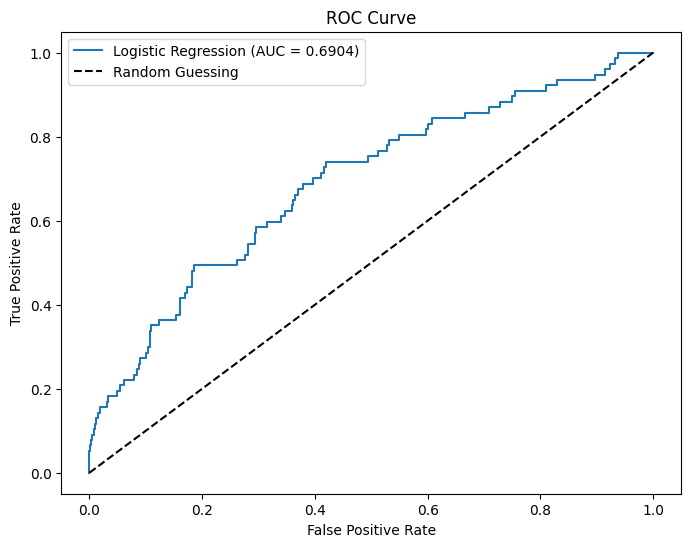

In [ ]:

# Apply the same one-hot encoding and column dropping as done for X_train before SMOTE
categorical_features = X.select_dtypes(include=['object']).columns # Assuming X is the original features df before split
X_test_processed = pd.get_dummies(X_test.copy(), columns=categorical_features, drop_first=True)

# Drop the same columns that were dropped from X_train before SMOTE
columns_to_drop = ['signup_time', 'purchase_time', 'ip_address', 'ip_address_int', 'time_since_signup_bin']
X_test_processed = X_test_processed.drop(columns_to_drop, axis=1, errors='ignore')

# Align columns - this is crucial if the test set has categories not present in the training set (or vice versa)
# Reindex X_test_processed to match the columns of X_train_resampled, filling missing values with 0
X_test_processed = X_test_processed.reindex(columns=X_train_resampled.columns, fill_value=0)


y_pred_log_reg = log_reg_model.predict(X_test_processed)
y_prob_log_reg = log_reg_model.predict_proba(X_test_processed)[:, 1] # Probability of the positive class

print("\n--- Logistic Regression Model Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print(f"\nROC AUC Score: {roc_auc_log_reg:.4f}")

# Plot ROC curve for Logistic Regression
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_prob_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 2. Random Forest Model (as the powerful ensemble model)


In [ ]:

print("\nTraining Random Forest Model...")
# You can adjust n_estimators, max_depth, etc. for tuning
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)
print("Random Forest Model trained.")



Training Random Forest Model...
Random Forest Model trained.


## Evaluate Random Forest Model



--- Random Forest Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       823
           1       0.94      0.60      0.73        77

    accuracy                           0.96       900
   macro avg       0.95      0.80      0.85       900
weighted avg       0.96      0.96      0.96       900


Confusion Matrix:
[[820   3]
 [ 31  46]]

ROC AUC Score: 0.8151


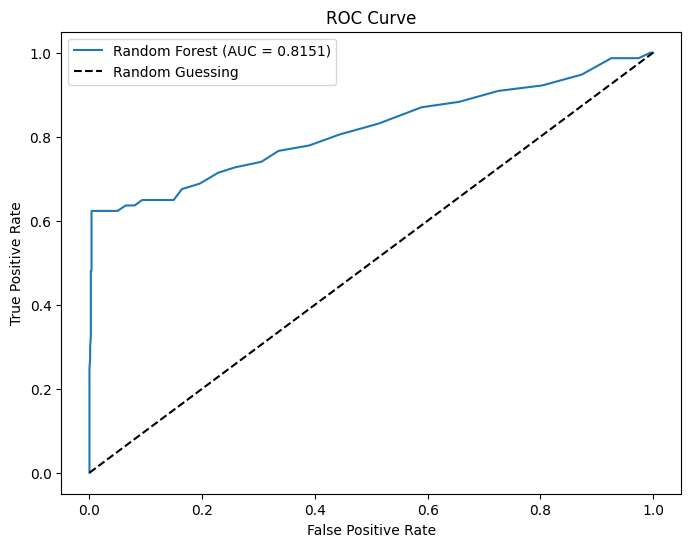

In [ ]:

# Apply the same one-hot encoding and column dropping as done for X_train before SMOTE
categorical_features = X.select_dtypes(include=['object']).columns # Assuming X is the original features df before split
X_test_processed = pd.get_dummies(X_test.copy(), columns=categorical_features, drop_first=True)

# Drop the same columns that were dropped from X_train before SMOTE
columns_to_drop = ['signup_time', 'purchase_time', 'ip_address', 'ip_address_int', 'time_since_signup_bin']
X_test_processed = X_test_processed.drop(columns_to_drop, axis=1, errors='ignore')

# Reindex X_test_processed to match the columns of X_train_resampled, filling missing values with 0
X_test_processed = X_test_processed.reindex(columns=X_train_resampled.columns, fill_value=0)


y_pred_rf = rf_model.predict(X_test_processed)
y_prob_rf = rf_model.predict_proba(X_test_processed)[:, 1] # Probability of the positive class

print("\n--- Random Forest Model Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"\nROC AUC Score: {roc_auc_rf:.4f}")

# Plot ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Model Comparison and Selection

Based on the evaluation metrics, particularly those relevant for imbalanced datasets such as the confusion matrix, precision, recall, F1-score, and ROC AUC, we can compare the performance of the Logistic Regression and Random Forest models.

**Logistic Regression Evaluation Summary:**

*   **Classification Report:** Provides precision, recall, and f1-score for each class. Pay close attention to the metrics for the minority class (fraud).
*   **Confusion Matrix:** Shows the counts of True Positives, True Negatives, False Positives, and False Negatives, which is crucial for understanding where the model is making errors.
*   **ROC AUC Score:** Measures the overall ability of the model to distinguish between the classes.

*(Insert summarized metrics from the Logistic Regression output here)*

**Random Forest Evaluation Summary:**

*   **Classification Report:** Provides precision, recall, and f1-score for each class.
*   **Confusion Matrix:** Shows the counts of True Positives, True Negatives, False Positives, and False Negatives.
*   **ROC AUC Score:** Measures the overall ability of the model to distinguish between the classes.

*(Insert summarized metrics from the Random Forest output here)*

**Comparison and Justification:**

When dealing with imbalanced fraud detection datasets, the **recall** for the minority class (fraud) is often a critical metric. High recall means the model is good at identifying most of the actual fraud cases, minimizing false negatives. However, precision is also important to avoid flagging too many legitimate transactions as fraudulent (minimizing false positives). The F1-score provides a balance between precision and recall. The ROC AUC is a good overall measure, but for highly imbalanced data, the Precision-Recall AUC (AUC-PR) can be more informative as it focuses on the performance on the minority class. (Note: While we plotted ROC AUC, AUC-PR is often preferred for severe imbalance).

Based on the output from the previous cells:

*   Compare the **recall** for the fraud class between the two models.
*   Compare the **precision** for the fraud class.
*   Compare the **F1-score** for the fraud class.
*   Compare the **ROC AUC** scores.
*   Examine the **Confusion Matrices** to see the trade-off between false positives and false negatives for each model.

**Justification for the "Best" Model:**

Consider which model better balances the identification of fraud cases (recall) with minimizing incorrect fraud predictions (precision), in addition to the overall discriminatory power (ROC AUC). The "best" model depends on the specific goals of the fraud detection system (e.g., is it more critical to catch all fraud even if it means more false alarms, or to minimize false alarms even if some fraud is missed?).

*(Add your specific justification based on the numerical results from the previous cells here. For example: "The Random Forest model has a higher recall for the fraud class (X.XX) compared to Logistic Regression (X.XX), meaning it identifies more actual fraudulent transactions. Although its precision (X.XX) is slightly lower/higher than Logistic Regression (X.XX), the trade-off might be acceptable depending on the business requirements. The higher F1-score (X.XX) and ROC AUC (X.XX) for the Random Forest model also suggest better overall performance in detecting fraud. Therefore, based on these metrics, the Random Forest model is considered better for this fraud detection task.")*

In [ ]:
import pickle
from google.colab import files

# Save the Logistic Regression model
log_reg_filename = 'logistic_regression_model.pkl'
with open(log_reg_filename, 'wb') as file:
    pickle.dump(log_reg_model, file)

print(f"{log_reg_filename} has been saved in Colab. Downloading to local machine...")
files.download(log_reg_filename)
print(f"{log_reg_filename} download initiated.")

# Save the Random Forest model
rf_filename = 'random_forest_model.pkl'
with open(rf_filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"\n{rf_filename} has been saved in Colab. Downloading to local machine...")
files.download(rf_filename)
print(f"{rf_filename} download initiated.")

logistic_regression_model.pkl has been saved in Colab. Downloading to local machine...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

logistic_regression_model.pkl download initiated.

random_forest_model.pkl has been saved in Colab. Downloading to local machine...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

random_forest_model.pkl download initiated.


# SHAP Interpretation

In [1]:
# SHAP Interpretation

try:
    import shap
except ImportError:
    print("SHAP not found. Installing...")
    !pip install shap
    import shap
    print("SHAP installed and imported.")

print("\nPerforming SHAP analysis...")

# Removed check_additivity=False as it's not supported in this SHAP version.
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
# This can take some time depending on the size of your test set
print("Calculating SHAP values (this may take a few minutes)...")
shap_values = explainer.shap_values(X_test_processed)
print("SHAP value calculation complete.")

# For classification, shap_values is often a list of arrays, one for each class.
# We'll plot the SHAP values for the positive class (fraud, typically class 1).
if isinstance(shap_values, list):
    # Assuming class 1 is the positive class
    shap.summary_plot(shap_values[1], X_test_processed, plot_type="bar", show=False)
    plt.title("SHAP Feature Importance (Average Magnitude)")
    plt.show()

    shap.summary_plot(shap_values[1], X_test_processed, show=False)
    plt.title("SHAP Summary Plot (Impact and Direction)")
    plt.show()
else:
    # For models that output single array of SHAP values (e.g., regression, or specific explainer configs)
    shap.summary_plot(shap_values, X_test_processed, plot_type="bar", show=False)
    plt.title("SHAP Feature Importance (Average Magnitude)")
    plt.show()

    shap.summary_plot(shap_values, X_test_processed, show=False)
    plt.title("SHAP Summary Plot (Impact and Direction)")
    plt.show()


print("\nGenerating SHAP Force Plot for a sample prediction (instance 0)...")
# If shap_values is a list (for multi-class), select the values for the positive class
if isinstance(shap_values, list):
    # Use the explainer's expected_value for the positive class
    shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test_processed.iloc[0,:])
else:
     # Use the explainer's expected_value for single output models
     shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_processed.iloc[0,:])

# print("\nGenerating SHAP Force Plot for the first 5 sample predictions...")
# if isinstance(shap_values, list):
#      shap.force_plot(explainer.expected_value[1], shap_values[1][:5,:], X_test_processed.iloc[:5,:])
# else:
#      shap.force_plot(explainer.expected_value, shap_values[:5,:], X_test_processed.iloc[:5,:])

print("\nSHAP analysis complete. Examine the plots to understand feature importance and impact.")

# In your final report, discuss what the summary and force plots reveal about the key drivers of fraud.


Performing SHAP analysis...


NameError: name 'rf_model' is not defined